In [13]:
import numpy as np
import pandas as pd
import torchvision.transforms.functional as TF
import torch
import torch.nn as nn

In [14]:
batchSize = 4
epochs =5
inChannels = 3
imgHeight = 256
imgWidth = 256
noClasses = 10

In [4]:
# model = nn.Sequential(
#         nn.Conv2d(3,8,3),
#         nn.MaxPool2d(2),
#         nn.Flatten(),
#         nn.Conv1d(8,16,3),
#         nn.MaxPool2d(2),
#         nn.ReLU(),
#         nn.Linear(16,32),
#         nn.ReLU(),
#         nn.Linear(32,10),
#         )

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(3,8,3),
            nn.MaxPool1d(2),
            nn.Conv1d(8,16,3),
            nn.MaxPool1d(2),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cpu device


In [7]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv1d(8, 16, kernel_size=(3,), stride=(1,))
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ReLU()
    (5): Linear(in_features=16, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=10, bias=True)
  )
)


In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [1]:
import os
pathTenNew = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Ten New/")]

In [2]:
pathTen = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Ten Old/")]
pathFiftyNew = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Fifety New/")]
pathFiftyOld = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Fifety Old/")]
path5Hundred = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Five Hundred/")]
path100New = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Hundred New/")]
path100Old = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Hundred Old/")]
pathTwenty = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Twenty/")]
path2Hundred = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Two Hundred/")]
path2K = [f for f in os.listdir("Thai and Indian Currency Dataset256x256\Indian Currencies\Two Thousand/")]

In [3]:
categories = ["Ten Old", "Ten New", "Twenty", "Fifety Old", "Fifety New", "Five Hundred", "Hundred Old", "Hundred New", "Two Hundred", "Two Thousand"]

In [4]:
from skimage.io import imread_collection
from skimage import data, img_as_float, io, exposure

In [5]:
temp = io.imread("Thai and Indian Currency Dataset256x256\Indian Currencies\Ten New/"+pathTenNew[0])

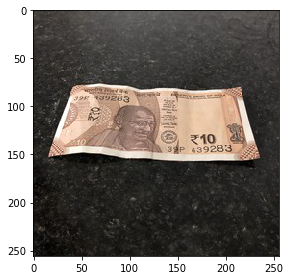

In [6]:
io.imshow(temp)

In [42]:
training = []
path_test = "Thai and Indian Currency Dataset256x256\Indian Currencies"
def createTrainingData():
    for category in categories:
        path = os.path.join(path_test, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
#             print(os.path.join(path,img))
#             img_array = io.imread(os.path.join(path,img))
#             new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training.append([img, class_num])
createTrainingData()


In [44]:
# numpyArray = np.asarray(training)
df = pd.DataFrame(numpyArray)
df.to_csv('labelsNew.csv')

In [9]:
import random

In [10]:
random.shuffle(training)

In [20]:
X =[]
y =[]
for features, label in training:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, 256, 256, 3)


In [21]:
def to_categorical(y, num_classes=None, dtype="float32"):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with `categorical_crossentropy`.
    Args:
        y: Array-like with class values to be converted into a matrix
            (integers from 0 to `num_classes - 1`).
        num_classes: Total number of classes. If `None`, this would be inferred
          as `max(y) + 1`.
        dtype: The data type expected by the input. Default: `'float32'`.
    Returns:
        A binary matrix representation of the input. The class axis is placed
        last.
    Example:
    >>> a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
    >>> a = tf.constant(a, shape=[4, 4])
    >>> print(a)
    tf.Tensor(
      [[1. 0. 0. 0.]
       [0. 1. 0. 0.]
       [0. 0. 1. 0.]
       [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)
    >>> b = tf.constant([.9, .04, .03, .03,
    ...                  .3, .45, .15, .13,
    ...                  .04, .01, .94, .05,
    ...                  .12, .21, .5, .17],
    ...                 shape=[4, 4])
    >>> loss = tf.keras.backend.categorical_crossentropy(a, b)
    >>> print(np.around(loss, 5))
    [0.10536 0.82807 0.1011  1.77196]
    >>> loss = tf.keras.backend.categorical_crossentropy(a, a)
    >>> print(np.around(loss, 5))
    [0. 0. 0. 0.]
    """
    y = np.array(y, dtype="int")
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical


# @keras_export("keras.utils.normalize")
def normalize(x, axis=-1, order=2):
    """Normalizes a Numpy array.
    Args:
        x: Numpy array to normalize.
        axis: axis along which to normalize.
        order: Normalization order (e.g. `order=2` for L2 norm).
    Returns:
        A normalized copy of the array.
    """
    l2 = np.atleast_1d(np.linalg.norm(x, order, axis))
    l2[l2 == 0] = 1
    return x / np.expand_dims(l2, axis)

In [22]:
X = X.astype('float32')
X /= 255
# from keras.utils import np_utils
Y = to_categorical(y, 10)
print(Y[100])
print(Y.shape)


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(1959, 10)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


In [32]:
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)
# import os
# import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

NameError: name 'Dataset' is not defined

In [33]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

NameError: name 'training_data' is not defined

ValueError: Must pass 2-d input. shape=(1959, 256, 256, 3)

In [40]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
import torchvision
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

KeyboardInterrupt: 